## Gradio Pycaret Classification

In [ ]:
# pip install pycaret

In [8]:
from pycaret.classification import *

In [9]:
# load the iris dataset from pycaret repo
from pycaret.datasets import get_data
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# PyCaret workflow always starts with setup function which prepares the environment for the entire machine learning pipeline. 
# Thus, setup must be executed before any other function.

# initialize setup - see more examples at the end
s = setup(data, target = 'species', session_id = 123, fold_shuffle=True)

,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


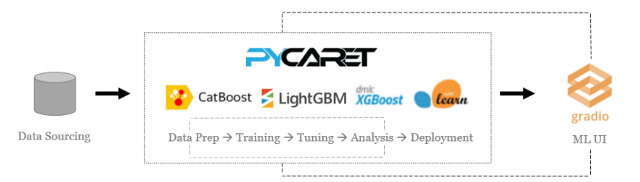

In [12]:
best = compare_models(n_select = 15)
compare_model_results = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.9986,0.9718,0.9780,0.9712,0.9573,0.9609,0.6600
qda,Quadratic Discriminant Analysis,0.9718,0.9974,0.9718,0.9780,0.9712,0.9573,0.9609,0.1860
lda,Linear Discriminant Analysis,0.9718,1.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.1820
lightgbm,Light Gradient Boosting Machine,0.9627,0.9922,0.9627,0.9707,0.9620,0.9436,0.9482,0.3290
knn,K Neighbors Classifier,0.9618,0.9844,0.9618,0.9705,0.9610,0.9422,0.9470,0.1880
et,Extra Trees Classifier,0.9436,0.9974,0.9436,0.9559,0.9425,0.9147,0.9217,0.2090
xgboost,Extreme Gradient Boosting,0.9436,0.9883,0.9436,0.9559,0.9425,0.9147,0.9217,0.1960
catboost,CatBoost Classifier,0.9436,0.9974,0.9436,0.9559,0.9425,0.9147,0.9217,0.2420
gbc,Gradient Boosting Classifier,0.9345,0.9805,0.9345,0.9541,0.9304,0.9009,0.9128,0.2240
nb,Naive Bayes,0.9336,1.0000,0.9336,0.9484,0.9322,0.8995,0.9079,0.1800


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [13]:
len(best)

15

In [14]:
print(best[:5])

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001), LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, 

In [15]:
# Lets choose any model from the list above

knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.9156,0.9091,0.9273,0.9076,0.8625,0.8735
2,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9000,0.9286,0.9000,0.9250,0.8971,0.8485,0.8616
7,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

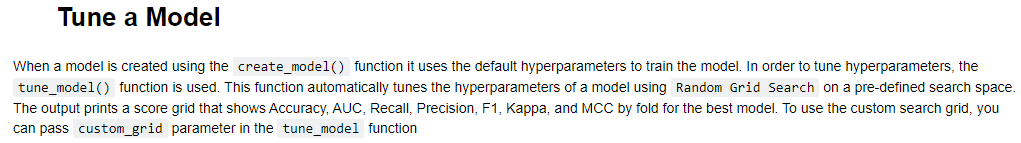

In [16]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
2,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [17]:
# Lets choose any model from the list above

lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
2,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
#tuned model object is stored in the variable 'tuned_knn'. 
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=12, p=2,
                     weights='distance')


In [19]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
2,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


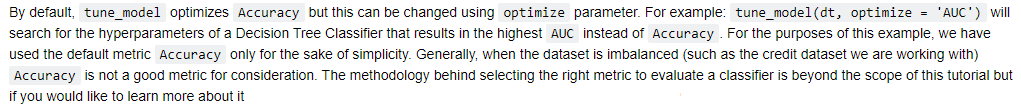

A Gentle Introduction to PyCaret for Machine Learning

https://machinelearningmastery.com/pycaret-for-machine-learning/

## Example to implement

In [20]:
# load dataset
from pycaret.datasets import get_data
hepatitis = get_data('hepatitis')

# init setup
from pycaret.classification import *

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [21]:
clf1 = setup(data = hepatitis, target = 'Class') # all the other parameters are optional

,Description,Value
0,Session id,6315
1,Target,Class
2,Target type,Binary
3,Original data shape,"(154, 20)"
4,Transformed data shape,"(154, 20)"
5,Transformed train set shape,"(107, 20)"
6,Transformed test set shape,"(47, 20)"
7,Numeric features,19
8,Rows with missing values,48.1%
9,Preprocess,True


In [22]:
# load dataset
from pycaret.datasets import get_data
credit = get_data('credit')

# init setup
from pycaret.classification import *
clf1 = setup(data = credit, target = 'default', fix_imbalance = True)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


,Description,Value
0,Session id,6600
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(33372, 24)"
5,Transformed train set shape,"(26172, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Implement pycaret for the above data